In [20]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
filename = "data/trackster_tags_200e_multi.root"
tracksters = uproot.open({filename: "tracksters"})

In [3]:
tracksters.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
nvertices_x          | int32_t                  | AsDtype('>i4')
vertices_x           | double[]                 | AsJagged(AsDtype('>f8'))
nvertices_y          | int32_t                  | AsDtype('>i4')
vertices_y           | double[]                 | AsJagged(AsDtype('>f8'))
nvertices_z          | int32_t                  | AsDtype('>i4')
vertices_z           | double[]                 | AsJagged(AsDtype('>f8'))
nvertices_energy     | int32_t                  | AsDtype('>i4')
vertices_energy      | double[]                 | AsJagged(AsDtype('>f8'))
nvertices_indexes    | int32_t                  | AsDtype('>i4')
vertices_indexes     | int64_t[]                | AsJagged(AsDtype('>i8'))
trackster_label      | int64_t                  | AsDtype('>i8')
trackster_event      | int64_t                  | AsDtype('>i8')


In [4]:
cx = tracksters["vertices_x"].array()
cy = tracksters["vertices_y"].array()
cz = tracksters["vertices_z"].array()
ce = tracksters["vertices_energy"].array()
cl = tracksters["trackster_label"].array()

In [21]:
complete = np.where(cl == 1)[0]
complete

<Array [2833, 2834, 2835, ... 31842, 31843] type='3162 * int64'>

In [22]:
incomplete = np.where(cl == 0)[0]
incomplete

<Array [0, 1, 2, 3, ... 31528, 31529, 31530] type='28682 * int64'>

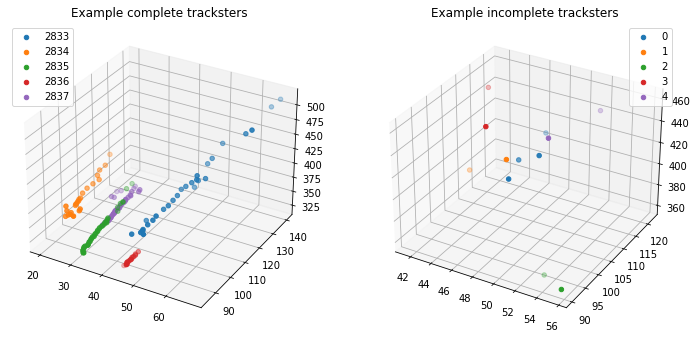

In [24]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(121, projection='3d')
tids = complete[:5]
for tid in tids:
    ax.scatter(cx[tid], cy[tid], cz[tid], label=tid)
ax.set_title(f"Example complete tracksters")
ax.legend()

ax = fig.add_subplot(122, projection='3d')
tids = incomplete[:5]
for tid in tids:
    ax.scatter(cx[tid], cy[tid], cz[tid], label=tid)
ax.set_title(f"Example incomplete tracksters")
ax.legend()
pass

In [25]:
ce_nvertices = [len(x) for i, x in enumerate(ce) if cl[i] == 1]
ie_nvertices = [len(x) for i, x in enumerate(ce) if cl[i] == 0]

ce_sum = [sum(x) for i, x in enumerate(ce) if cl[i] == 1]
ie_sum = [sum(x) for i, x in enumerate(ce) if cl[i] == 0]

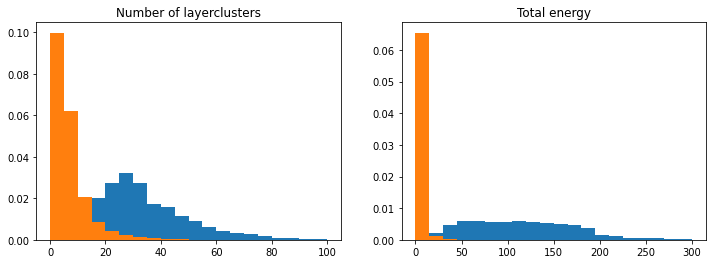

In [30]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(121)
ax.hist(ce_nvertices, bins=20, range=(0, 100), density=True)
ax.hist(ie_nvertices, bins=20, range=(0, 100), density=True)
ax.set_title("Number of layerclusters")
ax = fig.add_subplot(122)
ax.set_title("Total energy")
ax.hist(ce_sum, bins=20, range=(0, 300), density=True)
ax.hist(ie_sum, bins=20, range=(0, 300), density=True)

pass

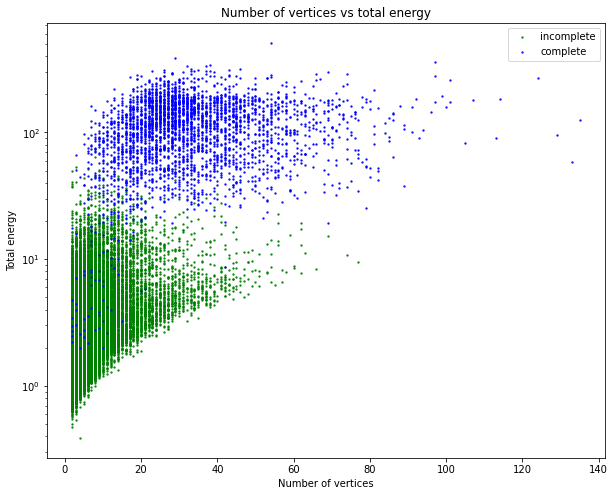

In [45]:
plt.figure(figsize=(10, 8))
plt.title("Number of vertices vs total energy")
plt.xlabel("Number of vertices")
plt.ylabel("Total energy")
plt.yscale("log")
plt.scatter(ie_nvertices, ie_sum, color="green", label="incomplete", s=2, alpha=0.8)
plt.scatter(ce_nvertices, ce_sum, color="blue", label="complete", s=2, alpha=0.8)
plt.legend()
pass